In [27]:
!pip uninstall gensim -y
!pip uninstall numpy -y

Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4


In [28]:
!pip install numpy

  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


In [29]:
!pip install gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from gensim.models import Word2Vec, FastText
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

# Download necessary NLTK resources
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

print("Building a more robust sentiment analysis model with Word2Vec...")


Building a more robust sentiment analysis model with Word2Vec...


In [2]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
# Create a larger, more diverse dataset
texts = [
    # Positive reviews (25)
    "I love this product, it's amazing and works great",
    "The customer service was excellent and responsive",
    "This is the best purchase I've made all year",
    "The quality exceeded my expectations",
    "I would highly recommend this to anyone",
    "Great product, fast shipping, excellent service",
    "Amazing value for money, very satisfied",
    "Works exactly as advertised, very pleased",
    "Excellent performance and reliability",
    "Super easy to use and very effective",
    "Customer support went above and beyond",
    "Fantastic quality and design",
    "Incredible features and user-friendly interface",
    "Very happy with my purchase",
    "Love the design and functionality",
    "Absolutely perfect for my needs",
    "Impressed with how well it performs",
    "Outstanding product quality and durability",
    "The best customer service I've experienced",
    "Exceeded all my expectations, truly wonderful",
    "Brilliant design and execution",
    "Delighted with this purchase, worth every penny",
    "Remarkable quality and attention to detail",
    "Excellent value, highly satisfied customer",
    "Thrilled with how well this works",

    # Negative reviews (25)
    "This product is terrible and broke immediately",
    "Worst experience ever, would not recommend",
    "The customer service was unhelpful and rude",
    "Complete waste of money, very disappointed",
    "I regret buying this, it doesn't work as advertised",
    "Poor quality product that failed within a week",
    "Horrible customer experience, avoid this company",
    "False advertising, product nothing like described",
    "Extremely frustrating to use, counterintuitive design",
    "Completely useless for its intended purpose",
    "Defective on arrival and difficult return process",
    "Awful performance, keeps crashing and freezing",
    "Very poor build quality, feels cheap",
    "Total disappointment, doesn't deliver on promises",
    "Unreliable and inconsistent results",
    "Terrible design with constant problems",
    "Waste of time and money, avoid at all costs",
    "Extremely dissatisfied with this purchase",
    "Product broke after minimal use, poor durability",
    "Appalling customer service and product quality",
    "Dreadful experience from start to finish",
    "Poorly made and overpriced junk",
    "Deeply disappointed with this product",
    "Awful company to deal with, never again",
    "Consistently fails to work properly"
]

labels = [1] * 25 + [0] * 25  # 1 for positive, 0 for negative

print(f"Dataset size: {len(texts)} reviews ({labels.count(1)} positive, {labels.count(0)} negative)")

Dataset size: 50 reviews (25 positive, 25 negative)


In [4]:
# Enhanced text preprocessing function
def preprocess_text(text, for_training=True):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    # Tokenize
    tokens = word_tokenize(text)

    # For training data, apply more aggressive preprocessing
    if for_training:
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        # Keep some important sentiment words that might be in stopwords
        sentiment_words = {'not', 'no', 'never', 'none'}
        filtered_stop_words = stop_words - sentiment_words
        tokens = [word for word in tokens if word not in filtered_stop_words and len(word) > 2]
        # Lemmatize
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    else:
        # For prediction data, just remove very short words
        tokens = [word for word in tokens if len(word) > 2]

    return tokens

In [5]:
# For debugging: print original and processed texts
print("\nSample text preprocessing:")
for i in range(2):
    print(f"Original (pos): {texts[i]}")
    print(f"Processed: {preprocess_text(texts[i])}")
for i in range(25, 27):
    print(f"Original (neg): {texts[i]}")
    print(f"Processed: {preprocess_text(texts[i])}")

# Preprocess all texts
processed_texts = [preprocess_text(text) for text in texts]

# Create FastText model (better for small datasets than Word2Vec)
print("\nTraining FastText model...")
fasttext_model = FastText(sentences=processed_texts,
                         vector_size=100,
                         window=5,
                         min_count=1,
                         workers=4,
                         sg=1,  # Skip-gram
                         epochs=200)  # More training epochs

print(f"Vocabulary size: {len(fasttext_model.wv.index_to_key)}")


Sample text preprocessing:
Original (pos): I love this product, it's amazing and works great
Processed: ['love', 'product', 'amazing', 'work', 'great']
Original (pos): The customer service was excellent and responsive
Processed: ['customer', 'service', 'excellent', 'responsive']
Original (neg): This product is terrible and broke immediately
Processed: ['product', 'terrible', 'broke', 'immediately']
Original (neg): Worst experience ever, would not recommend
Processed: ['worst', 'experience', 'ever', 'would', 'not', 'recommend']

Training FastText model...
Vocabulary size: 138


In [6]:
# Print some vocabulary statistics
word_freqs = {}
for doc in processed_texts:
    for word in doc:
        if word in word_freqs:
            word_freqs[word] += 1
        else:
            word_freqs[word] = 1

print(f"Total unique words: {len(word_freqs)}")
print("Top 10 most frequent words:")
for word, freq in sorted(word_freqs.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"  {word}: {freq}")

Total unique words: 138
Top 10 most frequent words:
  product: 9
  customer: 7
  quality: 7
  work: 5
  service: 5
  design: 5
  excellent: 4
  purchase: 4
  money: 3
  use: 3


In [7]:
# Enhanced document vector function with TF-IDF weighting
def document_vector(word2vec_model, doc_tokens, tfidf_weights=None):
    # Filter tokens in vocabulary
    doc_tokens = [token for token in doc_tokens if token in word2vec_model.wv.index_to_key]

    if not doc_tokens:
        # Return zero vector if no tokens are in vocabulary
        return np.zeros(word2vec_model.vector_size)

    if tfidf_weights is None:
        # Simple averaging if no weights provided
        return np.mean(word2vec_model.wv[doc_tokens], axis=0)
    else:
        # TF-IDF weighted average
        weighted_sum = np.zeros(word2vec_model.vector_size)
        weight_sum = 0

        for token in doc_tokens:
            if token in tfidf_weights:
                weighted_sum += word2vec_model.wv[token] * tfidf_weights[token]
                weight_sum += tfidf_weights[token]

        if weight_sum > 0:
            return weighted_sum / weight_sum
        else:
            return np.mean(word2vec_model.wv[doc_tokens], axis=0)

In [8]:
# Calculate TF-IDF weights
print("\nCalculating TF-IDF weights...")
text_data = [' '.join(tokens) for tokens in processed_texts]
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(text_data)
feature_names = vectorizer.get_feature_names_out()


Calculating TF-IDF weights...


In [9]:

# Create TF-IDF weight dictionary
tfidf_weights = {}
for i, feature in enumerate(feature_names):
    tfidf_weights[feature] = np.max(X_tfidf[:, i].toarray())

# Create feature vectors for each document using embeddings
print("Creating document vectors...")
X_fasttext = np.array([document_vector(fasttext_model, doc, tfidf_weights) for doc in processed_texts])
y = np.array(labels)

Creating document vectors...


In [10]:
# Also create a simple bag-of-words representation for comparison
print("Creating bag-of-words features for comparison...")
count_vectorizer = CountVectorizer(min_df=2)
X_bow = count_vectorizer.fit_transform(text_data)

Creating bag-of-words features for comparison...


In [11]:
# Split data
X_fasttext_train, X_fasttext_test, X_bow_train, X_bow_test, y_train, y_test = train_test_split(
    X_fasttext, X_bow, y, test_size=0.3, stratify=y, random_state=42)

In [12]:

# Train multiple models with strong hyperparameters
print("\nTraining multiple models...")

# 1. Logistic Regression with embedding features
lr_embedding = LogisticRegression(C=1.0, class_weight='balanced', max_iter=1000, random_state=42)
lr_embedding.fit(X_fasttext_train, y_train)

# 2. SVM with embedding features
svm_embedding = SVC(C=10, kernel='rbf', probability=True, class_weight='balanced', random_state=42)
svm_embedding.fit(X_fasttext_train, y_train)

# 3. Random Forest with embedding features
rf_embedding = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
rf_embedding.fit(X_fasttext_train, y_train)

# 4. Logistic Regression with bag-of-words features
lr_bow = LogisticRegression(C=1.0, class_weight='balanced', max_iter=1000, random_state=42)
lr_bow.fit(X_bow_train, y_train)


Training multiple models...


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [13]:
# Evaluation function
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return accuracy

In [14]:
# Evaluate all models
print("\n--- Model Evaluation ---")
acc1 = evaluate_model("Logistic Regression (FastText)", lr_embedding, X_fasttext_test, y_test)
acc2 = evaluate_model("SVM (FastText)", svm_embedding, X_fasttext_test, y_test)
acc3 = evaluate_model("Random Forest (FastText)", rf_embedding, X_fasttext_test, y_test)
acc4 = evaluate_model("Logistic Regression (BoW)", lr_bow, X_bow_test, y_test)


--- Model Evaluation ---

Logistic Regression (FastText) Performance:
Accuracy: 0.6667

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.67      0.57      0.62         7

    accuracy                           0.67        15
   macro avg       0.67      0.66      0.66        15
weighted avg       0.67      0.67      0.66        15


SVM (FastText) Performance:
Accuracy: 0.5333

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.50      0.57      0.53         7

    accuracy                           0.53        15
   macro avg       0.54      0.54      0.53        15
weighted avg       0.54      0.53      0.53        15


Random Forest (FastText) Performance:
Accuracy: 0.4667

Classification Report:
              precision    recall  f1-score   support

           0       0.50      

In [15]:
# Select best model
accuracies = [acc1, acc2, acc3, acc4]
models = [lr_embedding, svm_embedding, rf_embedding, lr_bow]
model_names = ["Logistic Regression (FastText)", "SVM (FastText)", "Random Forest (FastText)", "Logistic Regression (BoW)"]
X_test_options = [X_fasttext_test, X_fasttext_test, X_fasttext_test, X_bow_test]

best_idx = np.argmax(accuracies)
best_model = models[best_idx]
best_model_name = model_names[best_idx]
best_X_test = X_test_options[best_idx]

print(f"\nBest model: {best_model_name} with accuracy {accuracies[best_idx]:.4f}")


Best model: Logistic Regression (FastText) with accuracy 0.6667


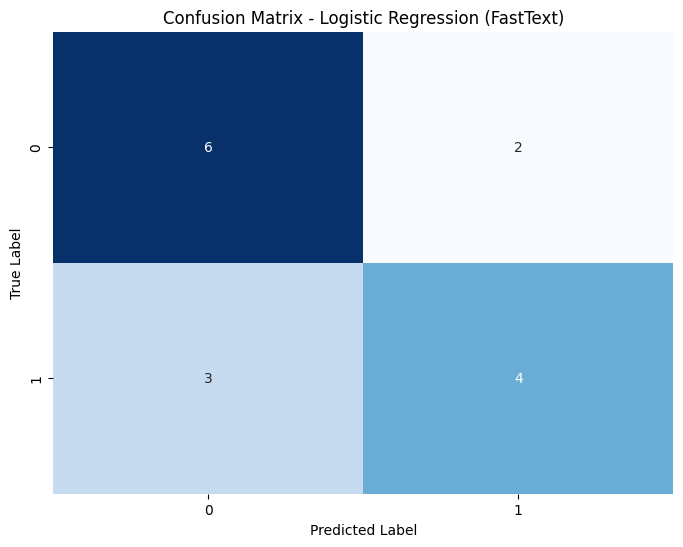

In [16]:
# Show confusion matrix for best model
y_pred = best_model.predict(best_X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [17]:
# Visualize word embeddings for key sentiment words
def plot_word_embeddings(model):
    sentiment_words = ['love', 'great', 'excellent', 'best', 'amazing', 'terrible', 'worst', 'poor', 'horrible', 'disappointed']
    available_words = [word for word in sentiment_words if word in model.wv.index_to_key]

    if len(available_words) < 2:
        print("Not enough sentiment words in vocabulary for visualization")
        return

    word_vectors = [model.wv[word] for word in available_words]

    # Convert the list of vectors to a NumPy array
    word_vectors_array = np.array(word_vectors)

    # Apply t-SNE
    # Perplexity should be less than the number of samples (words)
    perplexity_val = min(len(available_words) - 1, 5) if len(available_words) > 1 else 1
    if perplexity_val <= 1 and len(available_words) > 1:
         # Handle edge case for very small number of words where perplexity must be > 1
         perplexity_val = 2 if len(available_words) > 2 else 1 # Set to 2 if possible, otherwise 1 (will likely fail for 1 word)
         if perplexity_val == 1 and len(available_words) > 1:
             print("Warning: Perplexity set to 1. T-SNE might not produce meaningful results for very few words.")


    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_val)

    # Pass the NumPy array to fit_transform
    reduced_vectors = tsne.fit_transform(word_vectors_array)

    # Define colors
    pos_words = ['love', 'great', 'excellent', 'best', 'amazing']
    colors = ['green' if word in pos_words else 'red' for word in available_words]

    plt.figure(figsize=(10, 8))
    for i, word in enumerate(available_words):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], color=colors[i], edgecolors='k', s=100)
        plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]),
                    xytext=(5, 2), textcoords='offset points', fontsize=12)

    plt.title('t-SNE visualization of sentiment word embeddings')
    plt.tight_layout()
    plt.show()


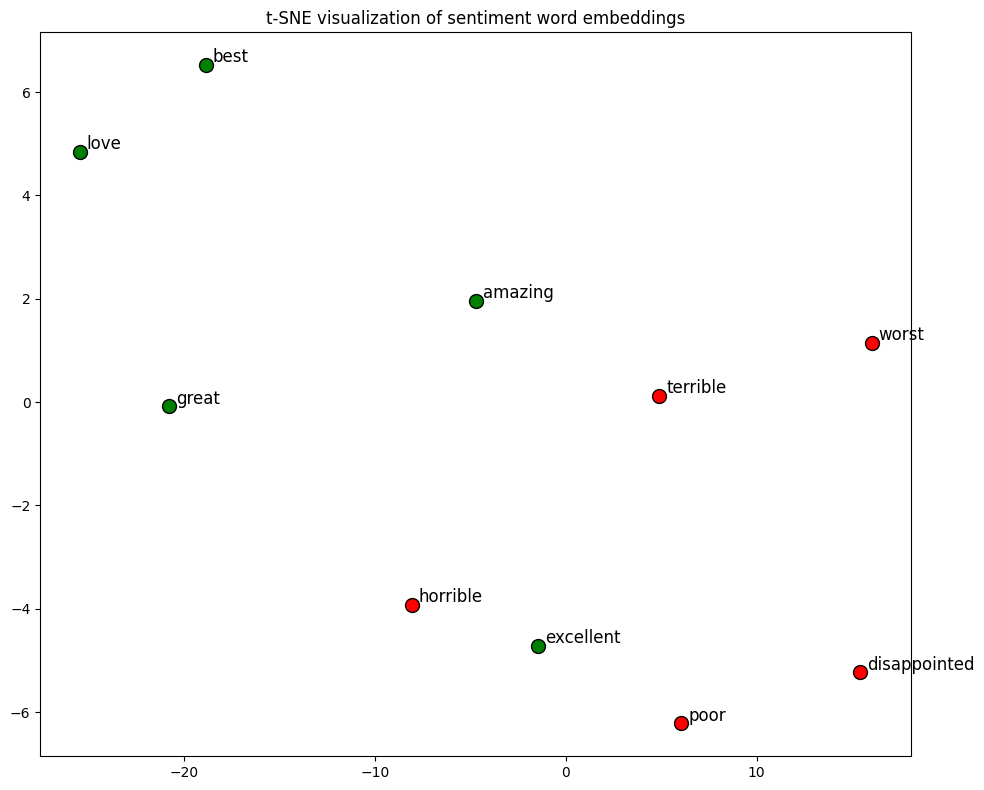

In [18]:

# Visualize sentiment words
plot_word_embeddings(fasttext_model)

In [31]:
# Find similar words for key sentiment words
def find_similar_words(word, model):
    """Finds words similar to a given word using the FastText model."""
    if word in model.wv:
        similar_words = model.wv.most_similar(word, topn=5)
        print(f"\nWords similar to '{word}':")
        for similar_word, score in similar_words:
            print(f"  {similar_word}: {score:.4f}")
    else:
        print(f"\nWord '{word}' not in vocabulary")


In [32]:
print("\n--- Word Similarities ---")
sentiment_words = ['love', 'great', 'terrible', 'poor', 'excellent', 'disappointing']
for word in sentiment_words:
    # Pass the current word and the model to the function
    find_similar_words(word, fasttext_model)


--- Word Similarities ---

Words similar to 'love':
  overpriced: 0.9997
  inconsistent: 0.9997
  dissatisfied: 0.9997
  advertised: 0.9997
  consistently: 0.9997

Words similar to 'great':
  excellent: 0.9997
  consistently: 0.9997
  remarkable: 0.9997
  inconsistent: 0.9997
  quality: 0.9997

Words similar to 'terrible':
  horrible: 0.9999
  constant: 0.9999
  consistently: 0.9999
  incredible: 0.9999
  excellent: 0.9999

Words similar to 'poor':
  poorly: 0.9999
  quality: 0.9998
  reliability: 0.9998
  overpriced: 0.9998
  durability: 0.9997

Words similar to 'excellent':
  performance: 0.9999
  reliability: 0.9999
  absolutely: 0.9999
  consistently: 0.9999
  experienced: 0.9999

Words similar to 'disappointing':
  disappointed: 1.0000
  disappointment: 1.0000
  promise: 0.9999
  excellent: 0.9999
  reliability: 0.9999


In [21]:
# Enhanced prediction pipeline for new texts
def predict_sentiment(text, models, vectorizers):
    # Unpack the models and vectorizers
    ft_model, classifier, is_bow_model = models
    tfidf_weights, count_vectorizer = vectorizers

    # Preprocess text (with for_training=False to be more lenient)
    tokens = preprocess_text(text, for_training=False)
    print(f"Processed tokens: {tokens}")

    # Generate features based on the classifier type
    if is_bow_model:
        # For BoW models
        text_transformed = count_vectorizer.transform([' '.join(tokens)])
        features = text_transformed
    else:
        # For embedding models
        doc_vec = document_vector(ft_model, tokens, tfidf_weights).reshape(1, -1)
        features = doc_vec

    # Predict
    prediction = classifier.predict(features)[0]
    probabilities = classifier.predict_proba(features)[0]

    sentiment = "Positive" if prediction == 1 else "Negative"
    confidence = probabilities[1] if prediction == 1 else probabilities[0]

    return sentiment, confidence, probabilities

In [22]:
# Test examples
test_texts = [
    "I'm really happy with my purchase, great value!",
    "Terrible experience, would not shop here again.",
    "The product quality is excellent.",
    "Disappointed with the poor customer service.",
    "This is absolutely amazing and exceeded all my expectations.",
    "Completely useless product, waste of money."
]


In [23]:
print("\n--- Sentiment Analysis Results ---")
print(f"Using model: {best_model_name}")


--- Sentiment Analysis Results ---
Using model: Logistic Regression (FastText)


In [24]:
# Determine if the best model is a BoW model
is_bow = best_model_name == "Logistic Regression (BoW)"
models_package = (fasttext_model, best_model, is_bow)
vectorizers_package = (tfidf_weights, count_vectorizer)

In [27]:
for text in test_texts:
    sentiment, confidence, probs = predict_sentiment(text, models_package, vectorizers_package)
    print(f"\nText: {text}")
    print(f"Predicted Sentiment: {sentiment}")
    print(f"Confidence: {confidence:.4f}")
    print(f"Probabilities [Negative, Positive]: [{probs[0]:.4f}, {probs[1]:.4f}]")


Processed tokens: ['really', 'happy', 'with', 'purchase', 'great', 'value']

Text: I'm really happy with my purchase, great value!
Predicted Sentiment: Positive
Confidence: 0.5886
Probabilities [Negative, Positive]: [0.4114, 0.5886]
Processed tokens: ['terrible', 'experience', 'would', 'not', 'shop', 'here', 'again']

Text: Terrible experience, would not shop here again.
Predicted Sentiment: Negative
Confidence: 0.5450
Probabilities [Negative, Positive]: [0.5450, 0.4550]
Processed tokens: ['the', 'product', 'quality', 'excellent']

Text: The product quality is excellent.
Predicted Sentiment: Negative
Confidence: 0.5409
Probabilities [Negative, Positive]: [0.5409, 0.4591]
Processed tokens: ['disappointed', 'with', 'the', 'poor', 'customer', 'service']

Text: Disappointed with the poor customer service.
Predicted Sentiment: Negative
Confidence: 0.5220
Probabilities [Negative, Positive]: [0.5220, 0.4780]
Processed tokens: ['this', 'absolutely', 'amazing', 'and', 'exceeded', 'all', 'expect

In [33]:
print("\n--- Word Similarities ---")
sentiment_words = ['love', 'great', 'terrible', 'poor', 'excellent', 'disappointing']
for word in sentiment_words:
    find_similar_words(word, fasttext_model)




--- Word Similarities ---

Words similar to 'love':
  overpriced: 0.9997
  inconsistent: 0.9997
  dissatisfied: 0.9997
  advertised: 0.9997
  consistently: 0.9997

Words similar to 'great':
  excellent: 0.9997
  consistently: 0.9997
  remarkable: 0.9997
  inconsistent: 0.9997
  quality: 0.9997

Words similar to 'terrible':
  horrible: 0.9999
  constant: 0.9999
  consistently: 0.9999
  incredible: 0.9999
  excellent: 0.9999

Words similar to 'poor':
  poorly: 0.9999
  quality: 0.9998
  reliability: 0.9998
  overpriced: 0.9998
  durability: 0.9997

Words similar to 'excellent':
  performance: 0.9999
  reliability: 0.9999
  absolutely: 0.9999
  consistently: 0.9999
  experienced: 0.9999

Words similar to 'disappointing':
  disappointed: 1.0000
  disappointment: 1.0000
  promise: 0.9999
  excellent: 0.9999
  reliability: 0.9999
